# Fetch data with PythonLidar

## Imports

In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
from python_lidar import PythonLidar
pl = PythonLidar(epsg=4326)

2021-08-25 01:48:01,874 — FileHandler — INFO — usgs_3dep_metadata read successfully


## Fetch USGS 3DEP Lidar data

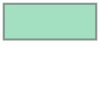

In [4]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))
polygon

In [5]:
gdf = pl.fetch_lidar(polygon, ["IA_FullState"])
gdf

2021-08-25 01:48:02,062 — FileHandler — INFO — usgs_3dep_pipeline read successfully
2021-08-25 01:48:02,062 — FileHandler — INFO — usgs_3dep_pipeline read successfully
2021-08-25 01:48:32,825 — GetData — INFO — successfully read geodata: IA_FullState_-10436887.43333523_-10435905.484106943_5148706.389047223_5149217.145836505


[{'year': nan,
  'region': 'IA_FullState',
  'geo_data':         elevation                    geometry
  0          318.46  POINT (-93.74736 41.92143)
  1          318.45  POINT (-93.74738 41.92142)
  2          318.40  POINT (-93.74739 41.92143)
  3          318.42  POINT (-93.74740 41.92143)
  4          318.53  POINT (-93.74736 41.92141)
  ...           ...                         ...
  213993     310.78  POINT (-93.75599 41.91872)
  213994     310.74  POINT (-93.75597 41.91872)
  213995     310.70  POINT (-93.75595 41.91871)
  213996     310.45  POINT (-93.75609 41.91872)
  213997     310.48  POINT (-93.75610 41.91872)
  
  [213998 rows x 2 columns]}]

In [6]:
df = gdf[0]['geo_data']

In [7]:
vis = pl.get_renderer(df)

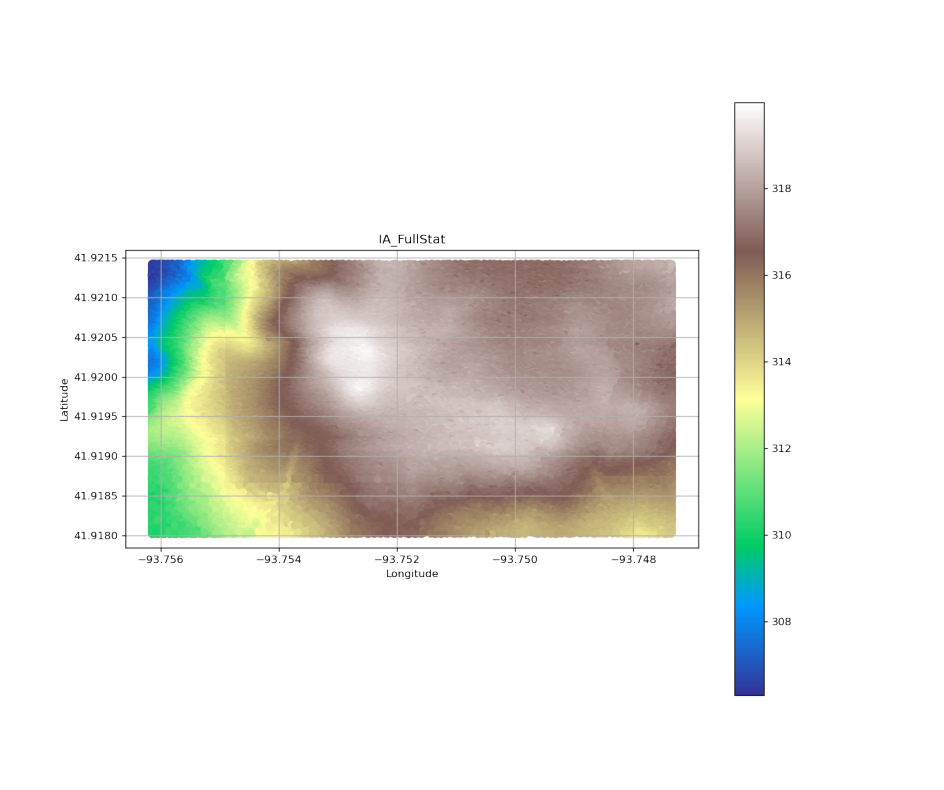

In [8]:
vis.plot_heatmap("IA_FullStat")

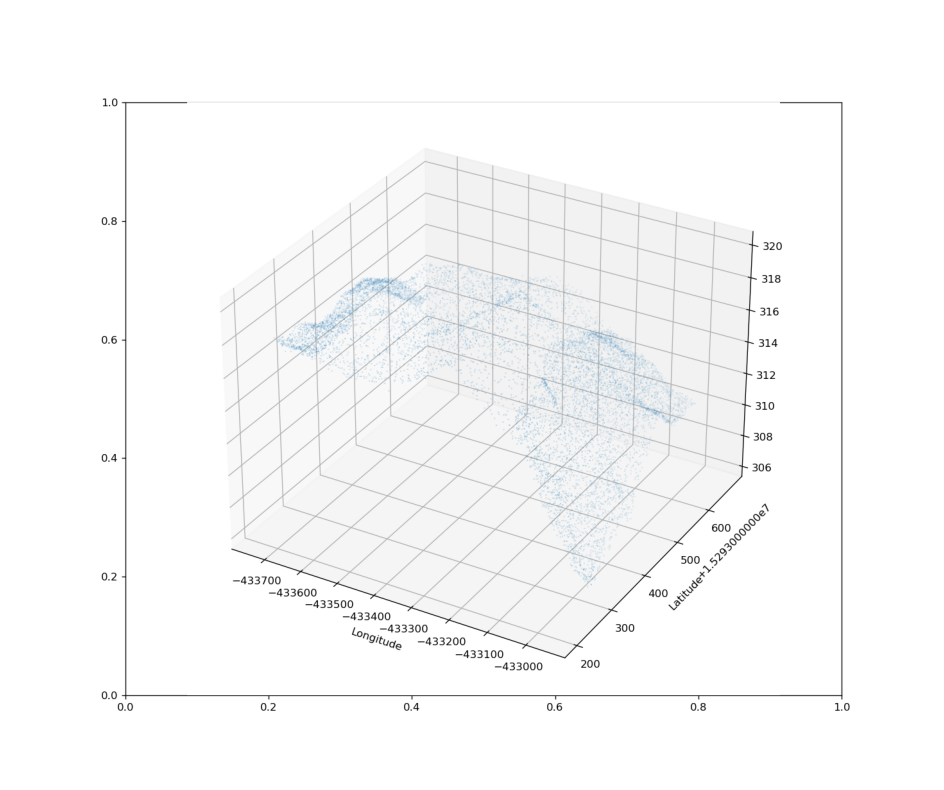

In [9]:
vis.render_3d()

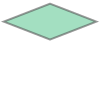

In [10]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
CENT_X = (MAXX - MINX)/2 + MINX
CENT_Y = (MAXY - MINY)/2+MINY
# polygon = Polygon(((MINX, MINY), (CENT_X, MAXY), (MAXX, MINY), (MINX, MINY)))
polygon = Polygon(((CENT_X, MINY), (MINX, CENT_Y), (CENT_X, MAXY), (MAXX, CENT_Y), (CENT_X, MINY)))
polygon

In [11]:
gdf = pl.fetch_lidar(polygon, ["IA_FullState"])
gdf

2021-08-25 01:49:09,123 — FileHandler — INFO — usgs_3dep_pipeline read successfully
2021-08-25 01:49:09,123 — FileHandler — INFO — usgs_3dep_pipeline read successfully
2021-08-25 01:49:52,190 — GetData — INFO — successfully read geodata: IA_FullState_-10436887.43333523_-10435905.484106943_5148706.389047223_5149217.145836505


[{'year': nan,
  'region': 'IA_FullState',
  'geo_data':        elevation                    geometry
  0         317.60  POINT (-93.74783 41.91989)
  1         317.58  POINT (-93.74782 41.91989)
  2         317.34  POINT (-93.74776 41.91987)
  3         317.31  POINT (-93.74772 41.91986)
  4         317.38  POINT (-93.74775 41.91987)
  ...          ...                         ...
  80519     317.06  POINT (-93.74982 41.92018)
  80520     317.58  POINT (-93.75059 41.92019)
  80521     317.81  POINT (-93.75138 41.92017)
  80522     318.92  POINT (-93.75217 41.92019)
  80523     318.16  POINT (-93.74822 41.91960)
  
  [80524 rows x 2 columns]}]

In [12]:
df = gdf[0]['geo_data'].copy()

In [13]:
vis = pl.get_renderer(df)

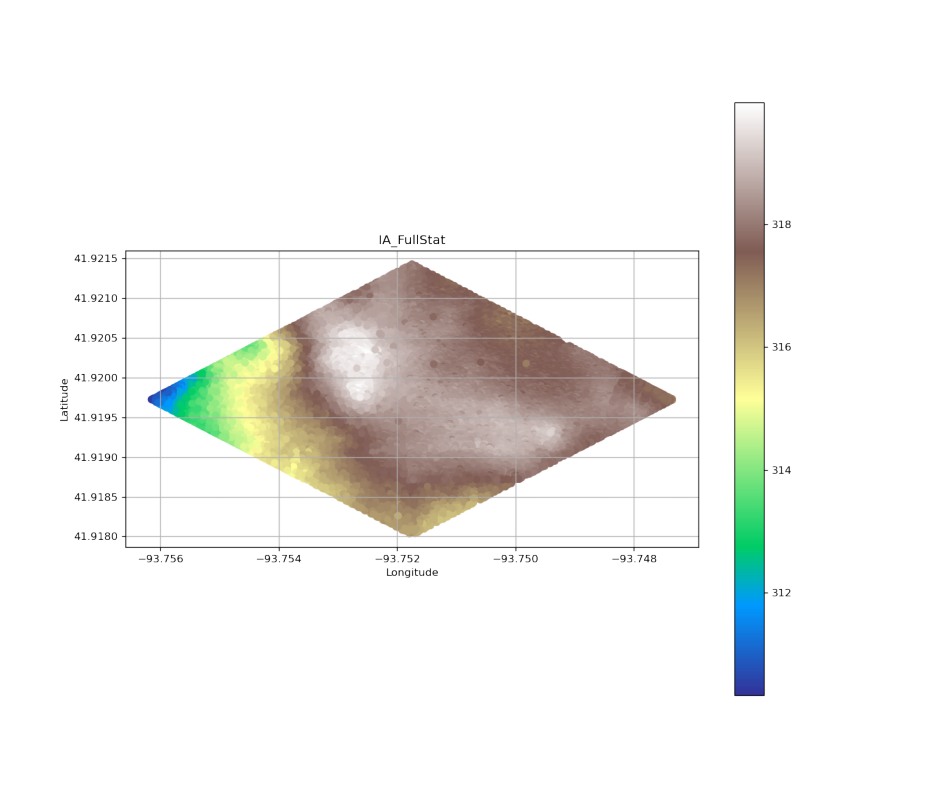

In [14]:
vis.plot_heatmap("IA_FullStat")